In [1]:
import os
import pandas as pd
import geopandas as gpd

local_crs = 32636
example_data_path = "./data"

Only blocks and matrix is needed to initialize a ``City`` model

In [2]:
from masterplan_tools.models import City 

aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

city_model = City(accessibility_matrix, aggregated_blocks)

/home/vasilstar/masterplanning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


``Block`` can be accessed via ``id``

``ServiceType`` entity can be obtained the same way by ``name``

In [3]:
block_123 = city_model[123]
service_type_schools = city_model['schools']

We can calculate, how much the service should supply to satisfy population needs

In [4]:
city_model['schools'].calculate_in_need(110)

14

``ServiceType`` is an entity, which describes certain service types available for the city, but doesn't provide geospatial services information (e.g. schools locations)

In [5]:
city_model.service_types

[ServiceType(name='kindergartens', accessibility=10, demand=61),
 ServiceType(name='schools', accessibility=15, demand=120),
 ServiceType(name='recreational_areas', accessibility=15, demand=6000),
 ServiceType(name='hospitals', accessibility=60, demand=9),
 ServiceType(name='pharmacies', accessibility=10, demand=50),
 ServiceType(name='policlinics', accessibility=15, demand=27)]

In [6]:
city_model.add_service_type('bakeries', accessibility=30, demand=5)
city_model['bakeries']

ServiceType(name='bakeries', accessibility=30, demand=5)

But now we can aggregate the info directly to the ``Block`` of the ``City`` from the ``GeoDataFrame``

In [8]:
bakeries = gpd.read_file(os.path.join(example_data_path, "bakeries.geojson")).to_crs(local_crs)
city_model.update_service_type_layer(service_type=city_model['bakeries'], gdf=bakeries)
print('Block bakeries capacity:', city_model[16]['bakeries'])

Block bakeries capacity: 0


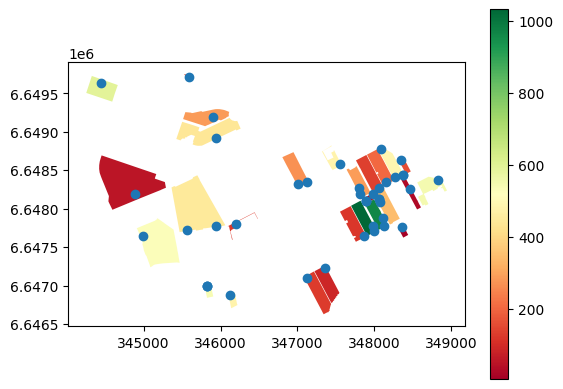

In [10]:
import matplotlib.pyplot as plt

bakeries_blocks = list(filter(lambda x : x['bakeries'] > 0, city_model.blocks))
gdf = gpd.GeoDataFrame(map(lambda block : {"id":block.id, "capacity": block['bakeries'], "geometry": block.geometry}, bakeries_blocks))
fig, ax = plt.subplots()
gdf.plot(ax=ax, alpha=1, column='capacity', legend=True, cmap='RdYlGn')
bakeries.plot(ax=ax)
plt.show()